In [1]:
import os
import shutil
import random


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

c:\Users\NIKHIL\anaconda3\envs\mlapp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\NIKHIL\.cache\kagglehub\datasets\shaunthesheep\microsoft-catsvsdogs-dataset\versions\1


In [3]:
CAT_DIR = os.path.join("PetImages", "Cat")
DOG_DIR = os.path.join("PetImages", "Dog")

IMAGE_EXTENSIONS = (".jpg", ".jpeg", ".png")

TOTAL_PER_CLASS = 12500
TRAIN_COUNT = 10000
TEST_COUNT = 2500


In [4]:
cat_images = [
    img for img in os.listdir(CAT_DIR)
    if img.lower().endswith(IMAGE_EXTENSIONS)
]

dog_images = [
    img for img in os.listdir(DOG_DIR)
    if img.lower().endswith(IMAGE_EXTENSIONS)
]

print("Total Cat images:", len(cat_images))
print("Total Dog images:", len(dog_images))


Total Cat images: 12500
Total Dog images: 12500


In [5]:
random.shuffle(cat_images)
random.shuffle(dog_images)

cat_images = cat_images[:TOTAL_PER_CLASS]
dog_images = dog_images[:TOTAL_PER_CLASS]


In [6]:
os.makedirs("dataset/train/Cat")
os.makedirs("dataset/train/Dog")
os.makedirs("dataset/test/Cat")
os.makedirs("dataset/test/Dog")


In [7]:
cat_train = cat_images[:TRAIN_COUNT]
cat_test = cat_images[TRAIN_COUNT:TRAIN_COUNT + TEST_COUNT]

dog_train = dog_images[:TRAIN_COUNT]
dog_test = dog_images[TRAIN_COUNT:TRAIN_COUNT + TEST_COUNT]


In [8]:
for img in dog_train:
    shutil.copy(
        os.path.join(DOG_DIR, img),
        os.path.join("dataset", "train", "Dog", img)
    )

for img in dog_test:
    shutil.copy(
        os.path.join(DOG_DIR, img),
        os.path.join("dataset", "test", "Dog", img)
    )


In [9]:
for img in cat_train:
    shutil.copy(
        os.path.join(CAT_DIR, img),
        os.path.join("dataset", "train", "Cat", img)
    )

for img in cat_test:
    shutil.copy(
        os.path.join(CAT_DIR, img),
        os.path.join("dataset", "test", "Cat", img)
    )


In [10]:
DATASET_DIR = "dataset"

train_cat_dir = os.path.join(DATASET_DIR, "train", "Cat")
train_dog_dir = os.path.join(DATASET_DIR, "train", "Dog")

test_cat_dir = os.path.join(DATASET_DIR, "test", "Cat")
test_dog_dir = os.path.join(DATASET_DIR, "test", "Dog")

train_cat_count = len([f for f in os.listdir(train_cat_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
train_dog_count = len([f for f in os.listdir(train_dog_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

test_cat_count = len([f for f in os.listdir(test_cat_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
test_dog_count = len([f for f in os.listdir(test_dog_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
print("TRAIN Cat:", train_cat_count)
print("TRAIN Dog:", train_dog_count)
print("TEST  Cat:", test_cat_count)
print("TEST  Dog:", test_dog_count)

print("TOTAL TRAIN:", train_cat_count + train_dog_count)
print("TOTAL TEST:", test_cat_count + test_dog_count)


TRAIN Cat: 10000
TRAIN Dog: 10000
TEST  Cat: 2500
TEST  Dog: 2500
TOTAL TRAIN: 20000
TOTAL TEST: 5000


In [16]:
print(train_generator.samples, "training images")
print(test_generator.samples, "test images")
print(train_generator.class_indices)


19998 training images
5000 test images
{'Cat': 0, 'Dog': 1}


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input


IMG_SIZE = (224, 224)
BATCH_SIZE = 32  


# Train data generator with strong augmentation + EfficientNet preprocessing

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # scales pixels properly for EfficientNet
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest'
)

# -----------------------------
# Test/Validation data generator
# -----------------------------
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # same preprocessing for test
)

# -----------------------------
# Load train data
# -----------------------------
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

# -----------------------------
# Load test data
# -----------------------------
test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [12]:
import os
from PIL import Image

def remove_bad_images(folder_path):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)
                img.verify()  # verify if it can be opened
            except (IOError, SyntaxError, Image.UnidentifiedImageError):
                print("Removing corrupted image:", file_path)
                os.remove(file_path)
                count += 1
    print("Removed", count, "corrupted images")


remove_bad_images('dataset/train/Cat')
remove_bad_images('dataset/train/Dog')
remove_bad_images('dataset/test/Cat')
remove_bad_images('dataset/test/Dog')


Removing corrupted image: dataset/train/Cat\666.jpg
Removed 1 corrupted images
Removing corrupted image: dataset/train/Dog\11702.jpg


c:\Users\NIKHIL\anaconda3\envs\mlapp\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Removed 1 corrupted images
Removed 0 corrupted images
Removed 0 corrupted images


In [14]:
DATASET_DIR = "dataset"

train_cat_dir = os.path.join(DATASET_DIR, "train", "Cat")
train_dog_dir = os.path.join(DATASET_DIR, "train", "Dog")

test_cat_dir = os.path.join(DATASET_DIR, "test", "Cat")
test_dog_dir = os.path.join(DATASET_DIR, "test", "Dog")

train_cat_count = len([f for f in os.listdir(train_cat_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
train_dog_count = len([f for f in os.listdir(train_dog_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

test_cat_count = len([f for f in os.listdir(test_cat_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
test_dog_count = len([f for f in os.listdir(test_dog_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
print("TRAIN Cat:", train_cat_count)
print("TRAIN Dog:", train_dog_count)
print("TEST  Cat:", test_cat_count)
print("TEST  Dog:", test_dog_count)

print("TOTAL TRAIN:", train_cat_count + train_dog_count)
print("TOTAL TEST:", test_cat_count + test_dog_count)


TRAIN Cat: 9999
TRAIN Dog: 9999
TEST  Cat: 2500
TEST  Dog: 2500
TOTAL TRAIN: 19998
TOTAL TEST: 5000


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


# Model constants

IMG_SIZE = (224, 224, 3)
DROPOUT_RATE = 0.5

# Load base EfficientNetB0 (pretrained on ImageNet)

base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=IMG_SIZE
)

# Freeze base model
base_model.trainable = False

# Custom top layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(DROPOUT_RATE)(x)
x = Dense(712)(x)
x = BatchNormalization()(x)    
x = Dense(512, activation='relu')(x)
x = Dropout(DROPOUT_RATE)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)


# Compile the model

model.compile(
    optimizer=Adam(learning_rate=1e-4), 
    loss='binary_crossentropy',
    metrics=['accuracy']
)


model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

Using 12 CPU cores
Epoch 1/15
561/624 [=========================>....] - ETA: 33s - loss: 0.0902 - accuracy: 0.9671

c:\Users\NIKHIL\anaconda3\envs\mlapp\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 [==============================] - ETA: 0s - loss: 0.0881 - accuracy: 0.9674
Epoch 1: val_accuracy improved from -inf to 0.98838, saving model to best_cat_dog_model.h5


c:\Users\NIKHIL\anaconda3\envs\mlapp\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


624/624 [==============================] - 429s 677ms/step - loss: 0.0881 - accuracy: 0.9674 - val_loss: 0.0320 - val_accuracy: 0.9884 - lr: 1.0000e-04
Epoch 2/15
624/624 [==============================] - ETA: 0s - loss: 0.0627 - accuracy: 0.9773
Epoch 2: val_accuracy improved from 0.98838 to 0.99018, saving model to best_cat_dog_model.h5
624/624 [==============================] - 424s 677ms/step - loss: 0.0627 - accuracy: 0.9773 - val_loss: 0.0270 - val_accuracy: 0.9902 - lr: 1.0000e-04
Epoch 3/15
624/624 [==============================] - ETA: 0s - loss: 0.0590 - accuracy: 0.9785
Epoch 3: val_accuracy improved from 0.99018 to 0.99058, saving model to best_cat_dog_model.h5
624/624 [==============================] - 419s 670ms/step - loss: 0.0590 - accuracy: 0.9785 - val_loss: 0.0277 - val_accuracy: 0.9906 - lr: 1.0000e-04
Epoch 4/15
624/624 [==============================] - ETA: 0s - loss: 0.0590 - accuracy: 0.9785
Epoch 4: val_accuracy improved from 0.99058 to 0.99099, saving model

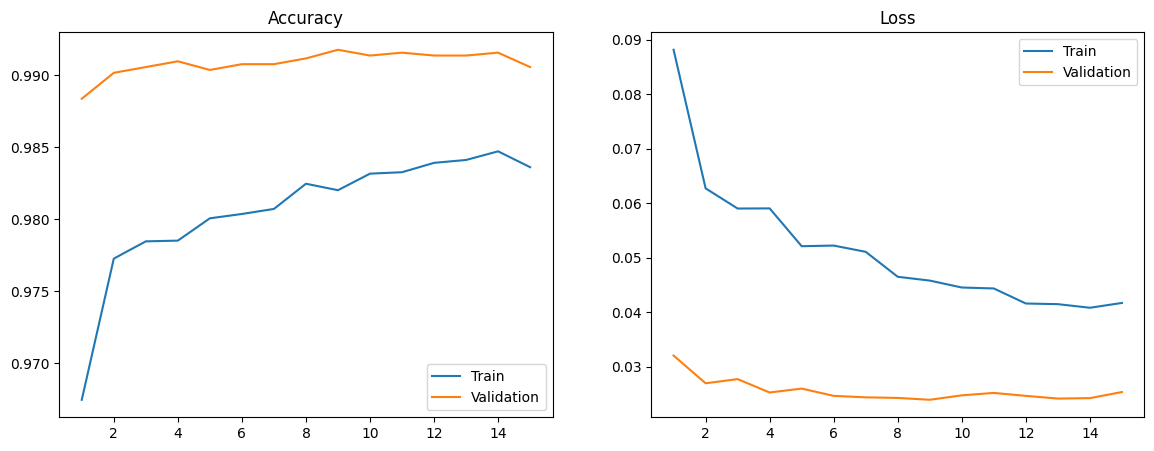

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os


steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

# Callbacks

callbacks_list = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=7,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        'best_cat_dog_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    )
]


num_cores = os.cpu_count()
print("Using", num_cores, "CPU cores")




base_model.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_stage1 = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    workers=num_cores,
    use_multiprocessing=False,
    max_queue_size=32,
    callbacks=callbacks_list
)


# Plot accuracy & loss

def plot_history(h1):
    acc = h1.history['accuracy']
    val_acc = h1.history['val_accuracy']
    loss = h1.history['loss']
    val_loss = h1.history['val_loss']

    
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Train')
    plt.plot(epochs, val_acc, label='Validation')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Train')
    plt.plot(epochs, val_loss, label='Validation')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_history(history_stage1)


In [ ]:
model.save("cat_dog_model_tf", save_format="tf")
